In [3]:
import numpy
import pandas
import matplotlib.pyplot as plt
import scipy
import torch

#Supervised Learning Regression#

Regression is similar to the supervised learning classification algorithms with the only difference being that predictions are not a fixed set of known points but any point in a continuous function. In general a regression is just the estimation of a function where:

$y = f(x,\theta) + \epsilon$

The residual error $\epsilon$ for the training set can be defined as:

$\epsilon_i = y_i - w^\top x_i$

Note that just like in a classification algorithm we want to determine the learning bias $\theta$ parameter that will parametrize the function (f) while minimizing the residual error.

##Regulatization RSS##

**Regularization**

Process of adding information so that we can solve a model where:

1. We don't have exact results.
2. There are multiple acceptable results.
3. The model is sensitive to initial conditions.
4. The model is prone to overfitting and memorization.

The residual error in a RSS model can be defined as:

$RSS(w) = \sum \forall_i (y_i - w^\top x_i) ^2 = ||\epsilon||_2^2$

Expanding the binomial we have that:

$\frac{(y-Xw)^\top(y-Xw)}{2} = \frac{w^\top(X^\top X)w}{2} - w^\top(X^\top y)$

Note that we will have a gradient ($X^\top Xw-X^\top y$) that is zero when: $X^\top Xw=X^\top y$. The property is known as the normal equation and it means that if the solution $\hat{w}$ is linear then the regression or solution to the model can be known by Ordinary Least Squares (OLS).

$\hat{w} = (X^\top X)^{-1} X^\top y$

The regression function corresponding to the solution is represented as:

$f(w) = \frac{||y-Xw||^2}{2}$

This is valid as long as $(X^\top X)^{-1}$ exists and is solvable, we can guarantee this will be true by adding information known as The Regularization Term:

$f(w) = \frac{||y-Xw||^2}{2} + \frac{||w||_Q}{2}$

This particular regularization term is called Tikhonov Regularization and it produces functions in the form of:

$\Delta f(w) = X^\top X_w - X^\top y + \lambda w$

Were we know that $(X^\top X)^{-1}$ exists since $w$ will be unique, also a useful property will be that:

$(X^\top X+\lambda I)w = X^\top y$

##Spearman Correlation##

**Spearman Correlation or Rho**

Measures the statistical dependance of two datasets from their possibility of creating a ranking order for every data pair between them:

$\rho = 1 - \frac{6\sum d_i ^2}{n(n^2-1)}$

Where ($d_i$) is the range difference between them $d_i = R(A_i) - R(B_i)$. Using this correlation we can stablish the relation betwen multiple predictions based on their range ranking order.

In [4]:
# Spearman Correlation for Ridge Regression
# Ridge uses an Ordinary Least Squares Linear Regression with l2 Regularization

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.datasets import load_diabetes

X, Y = load_diabetes (return_X_y = True)
X_train , X_test , Y_train , Y_test = train_test_split (X, Y, test_size = 0.2 );
R = [];
A = [];

for alphaParameter in numpy.linspace (0.1 ,0.99 ,10):
    Model = Ridge(alpha = alphaParameter)
    Model.fit(X_train , Y_train)
    Y_hat = Model.predict( X_test )
    rho, pvalue = scipy.stats.spearmanr (Y_hat , Y_test)
    A.append(alphaParameter)
    R.append(rho)

DF = pandas.DataFrame();
DF = DF.assign(Lambda = A);
DF = DF.assign(Rho = R);
print(DF)

     Lambda       Rho
0  0.100000  0.679297
1  0.198889  0.680914
2  0.297778  0.677007
3  0.396667  0.677722
4  0.495556  0.676692
5  0.594444  0.674164
6  0.693333  0.675772
7  0.792222  0.674921
8  0.891111  0.671431
9  0.990000  0.669771


In [ ]:
# There are many linear regression methods
# Some include some form of regularization or CV (Cross Validation)
# Lars stands for Least Angle Regression Model

from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.simplefilter("ignore", category=ConvergenceWarning)
warnings.simplefilter("ignore", category=FutureWarning)

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, SGDRegressor, ElasticNet, ElasticNetCV, Lars, LarsCV, Lasso, LassoCV, LassoLars, LassoLarsCV, LassoLarsIC, OrthogonalMatchingPursuit, OrthogonalMatchingPursuitCV, ARDRegression, BayesianRidge

Models = { 
    'OLS' : LinearRegression() ,
    'Ridge' : Ridge() ,
    'Ridge with CV' : RidgeCV() ,
    'SGDRegressor' : SGDRegressor() ,
    'ElasticNet' : ElasticNet() ,
    'ElasticNetCV' : ElasticNetCV(cv = 4) ,
    'Lars' : Lars() ,
    'LarsCV' : LarsCV(cv = 4) ,
    'Lasso' : Lasso() ,
    'LassoCV' : LassoCV(cv = 4) ,
    'LassoLars' : LassoLars() ,
    'LassoLarsCV' : LassoLarsCV(cv = 4) ,
    'OrthogonalMatchingPursuit' : OrthogonalMatchingPursuit() ,
    'ARDRegression' : ARDRegression() ,
    'BayesianRidge' : BayesianRidge()
}

X, Y = load_diabetes (return_X_y =True)

testingSizes = [0.99, 0.95, 0.9, 0.8, 0.7, 0.5]
randomSeeds = numpy.arange(40, 51, 1)
modelNames = []
currentRandomSeed = []
currentTestingSize = []
currentRhoSpearman = []

DF = pandas.DataFrame()

for (name, model) in Models.items():
    for randomSeed in randomSeeds:
        for testingSize in testingSizes:
            X_train , X_test , Y_train , Y_test = train_test_split (X, Y, test_size = testingSize , random_state = randomSeed)
            model.fit(X_train,Y_train)
            Y_hat = model.predict(X_test)
            rho, _ = scipy.stats.spearmanr (Y_hat , Y_test )
            modelNames.append(name)
            currentRandomSeed.append(randomSeed)
            currentTestingSize.append(testingSize)
            currentRhoSpearman.append(rho)

DF=DF.assign(ModelName = modelNames)
DF=DF.assign(RandomSeed = currentRandomSeed)
DF=DF.assign(TestingSize = currentTestingSize)
DF=DF.assign(RhoCorrelation = currentRhoSpearman)

In [6]:
DF = DF.nlargest(10,['RhoCorrelation'])
print(DF)

         ModelName  RandomSeed  TestingSize  RhoCorrelation
659        LassoCV          50          0.5        0.745905
923  ARDRegression          50          0.5        0.745552
791    LassoLarsCV          50          0.5        0.745479
197  Ridge with CV          50          0.5        0.740337
989  BayesianRidge          50          0.5        0.739632
65             OLS          50          0.5        0.736183
395   ElasticNetCV          50          0.5        0.731734
35             OLS          45          0.5        0.721274
431           Lars          45          0.5        0.721274
959  BayesianRidge          45          0.5        0.720224


##LSTM##

**Long Short Term Memory**

Neural network that models time series or any variable with a temporal component, it is made from a set of doors that regulate how much information travels to the neural network output.

$f_t = \sigma_g (W_f x_t + U_f h_{t-1} + b_f)$

$i_t = \sigma_g (W_i x_t + U_i h_{t-1} + b_i)$

$o_t = \sigma_g (W_o x_t + U_o h_{t-1} + b_o)$

$\hat{c}_t = \sigma_c (W_c x_t + U_c h_{t-1} + b_c)$

$c_t =  f_t \circ c_{t-1} + i_t \circ \hat{c}_t$

$h_t =  o_t \circ \sigma_h \left( c_t \right)$


Where ($x_t \in \mathbb{R}^{d}$) are out inputs, ($f_t \in (0,1)^{h}$) out forget vector, $i_t \in (0,1)^{h}$ our activation vector, $o_t \in (0,1)^{h}$ out output vector from activation, ($h_t \in (-1,1)^{h}$) out hidden memory state vector, ($\hat{c}_t \in (-1,1)^{h}$) out cell activation vector, ($c_t \in \mathbb{R}^{h}$) out cell state vector and $W \in \mathbb{R}^{h \times d}, U \in \mathbb{R}^{h \times h}, b \in \mathbb{R}^{h} $ out weights and learning biases.

Notice that $d$ and $h$ are the input vector dimension and the hidden matrix dimensions.

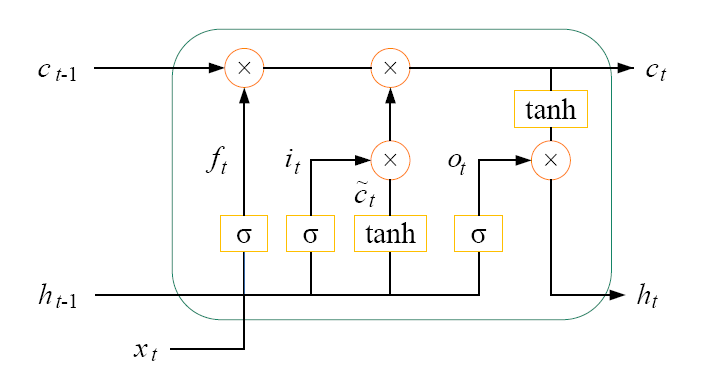

This neural network has the capacity to remember previous outputs as feedback for the next predictions, this memory is stored in the state vector $h_t$ as:

1. Input door: The actual input is process.
2. Output door: The output at a specific time is given.
3. Forget door: Past inputs that aren't relevant anymore to future predictions.

Notice that matrices W, U and b will store different aspects of previous outputs ($x_t$).

Even when there are no more observations $x_t$ the model can be a good predictive model since it can use the state of the active cell $c_t$ as the new input, meaning it can make a number of predictions without the need of any new input in $x_t$.

**Time Series**

Collection of spatial data over an interval of time. These describe the behavior of a model according to the variables that are acquiring different values. For example, a time series could be described by the sine function, where its input is time and its output is the observed value at a particular instant. It is possible to model a time series in a recursive neural network. This is a model that considers the previous moments to predict the next value:

![Yes](https://upload.wikimedia.org/wikipedia/commons/thumb/9/93/LSTM_Cell.svg/512px-LSTM_Cell.svg.png)

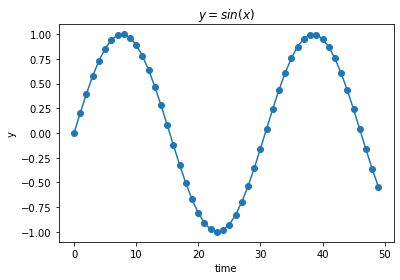

In [7]:
# Example of a time series
x = numpy.linspace(0,10,50)
y = numpy.sin(x);
plt.plot(y,marker="o")
plt.title(r'$y = sin(x)$', fontsize = 12)
plt.ylabel('y')
plt.xlabel('time')
plt.show()

In machine learning there are some models to capture this behavior:

* Long-Short Term Memory (LSTM)
* Recurrent Neural Network (RNN)
* Gated Recurrent Unit (GRU)
* Hidden Markov Models (HMM)
* Gaussian processes (GRP)

The first is used in particular for time series related to financial data.

In [8]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv --quiet

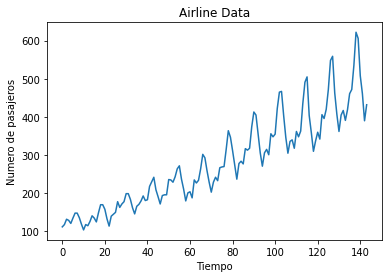

In [9]:
from sklearn.preprocessing import MinMaxScaler
DF = pandas.read_csv('airline-passengers.csv')
training_set = pandas.read_csv('airline-passengers.csv')
# Ignore the month number and just get the passangers per month
training_set = training_set.iloc[:, 1:2].values
plt.plot(training_set)
plt.title('Airline Data', fontsize = 12)
plt.ylabel('Numero de pasajeros')
plt.xlabel('Tiempo')
plt.show()

In [20]:
# Preparing the Data
def sliding_windows(data, seq_length):
    X = []
    Y = []
    for dataPoint in range(len(data) - seq_length - 1):
        x = data[ dataPoint : ( dataPoint + seq_length )]
        y = data[ dataPoint + seq_length]
        X.append(x)
        Y.append(y)
    return numpy.array(X), numpy.array(Y)

# Scale the training data so that it fits the training set
# In this case it uses the default of 0 for min and 1 for max
scaleTheData = MinMaxScaler()
training_data = scaleTheData.fit_transform(training_set)

# Sequence Length is the how long each input vector is
# In this case it will use 3 data points advancing to the next one
# (1,2,3) then (2,3,4) then (3,4,5) ...
sequenceLength = 3

# The outputs will be the next expected datapoint in the sequence
# (4) then (5) then (6) ...
x, y = sliding_windows(training_data, sequenceLength)

# Training and Testing Size
# In this case since the output is 140 datapoints
# Then 70% for training will be 98 datapoints with 42 left for testing
trainingSize = 0.7
train_size = int(len(y) * trainingSize)
test_size = len(y) - train_size

# Transform datapoints into tensors with automatic gradients
# Also adjust the size of the training and testing sets
dataX = torch.autograd.Variable(torch.Tensor(numpy.array(x)))
dataY = torch.autograd.Variable(torch.Tensor(numpy.array(y)))
trainX = torch.autograd.Variable(torch.Tensor(numpy.array(x[0:train_size])))
trainY = torch.autograd.Variable(torch.Tensor(numpy.array(y[0:train_size])))
testX = torch.autograd.Variable(torch.Tensor(numpy.array(x[train_size:len(x)])))
testY = torch.autograd.Variable(torch.Tensor(numpy.array(y[train_size:len(y)])))

# Create LSTM Neural Network Model
class LSTM(torch.nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(LSTM, self).__init__()
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        self.lstm = torch.nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        self.fc = torch.nn.Linear(hidden_size, num_classes)
    def forward(self, x):
        h_0 = torch.autograd.Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
        c_0 = torch.autograd.Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
        # Propagate the input through the LSTM model
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        h_out = h_out.view(-1, self.hidden_size)
        out = self.fc(h_out)
        return out

# Instance of the Model

numberOfClasses = 1
inputSize = 1
hiddenLayerSize = 2
numberOfLayers = 1
learningRate = 0.01

lstmInstance = LSTM(numberOfClasses, inputSize, hiddenLayerSize, numberOfLayers, sequenceLength)

# Use Mean Squared Error for the Regression in the Model
criterionFunction = torch.nn.MSELoss()

# Using normal gradiant descent with a fixed learning rate (SGD)
# optimizerFunction = torch.optim.SGD(lstmInstance.parameters(), lr=learningRate)
# Using adaptative gradiant descent with a variable learning rate (ADAM)
optimizerFunction = torch.optim.Adam(lstmInstance.parameters(), lr=learningRate)

# TRAINING
numberOfEphocs = 2000
for epoch in range(numberOfEphocs):
    outputs = lstmInstance(trainX)
    optimizerFunction.zero_grad()
    loss = criterionFunction(outputs, trainY)
    loss.backward()
    optimizerFunction.step()
    if epoch % 400 == 0:
      print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 0.09386
Epoch: 400, loss: 0.00237
Epoch: 800, loss: 0.00193
Epoch: 1200, loss: 0.00182
Epoch: 1600, loss: 0.00181


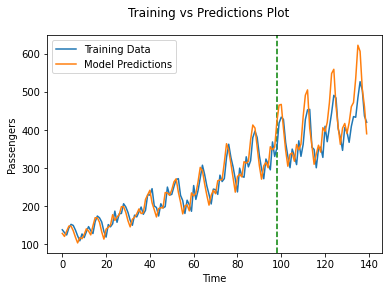

In [21]:
#TESTING
lstmInstance.eval()
trainingPredictions = lstmInstance(dataX)

# PLOT

dataPredictions = dataY.data.numpy()
dataPredictionsPlot = scaleTheData.inverse_transform(dataPredictions)
modelPredictions = trainingPredictions.data.numpy()
modelPredictionsPlot = scaleTheData.inverse_transform(modelPredictions)
plt.axvline(x = train_size, c ='g', linestyle='--')
plt.plot(modelPredictionsPlot, label = 'Training Data')
plt.plot(dataPredictionsPlot, label = 'Model Predictions')
plt.legend(loc="upper left")
plt.suptitle('Training vs Predictions Plot')
plt.ylabel('Passengers')
plt.xlabel('Time')
plt.show()